
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [2]:
# 第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

# 第二步：構建網絡層
 
model.add(Dense(500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense(500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense(500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense(10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

W0712 07:33:50.539833 139625475204992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 07:33:50.592621 139625475204992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 07:33:50.600338 139625475204992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [3]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [4]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

### 隨機梯度下降（SGD）：SGD 指的是 mini batch gradient descent 
* 優點：針對⼤數據集，訓練速度很快。從訓練集樣本中隨機選取一個 batch 計算一次梯度，更新一次模型參數。
* 缺點：對所有參數使⽤相同的學習率。對於稀疏數據或特徵，希望盡快更新⼀些不經常出現的特徵，慢⼀些更新常出現的特徵。所以選擇合適的學習率比較困難。容易收斂到局部最優 

### Adam：利用梯度的一階矩估計和二階矩估計動態調節每個參數的學習率。
* 優點：1.經過偏置校正後，每一次迭代都有確定的範圍，使得參數比較平穩。善於處理稀疏梯度和非平穩目標。2.對內存需求小 3.對不同內存計算不同的學習率

### RMSProp：⾃適應調節學習率。
* 對學習率進⾏了約束，適合處理非平穩目標和 RNN。


如果輸入數據集比較稀疏，SGD、NAG和動量項等⽅方法可能效果不好。因此對於稀疏數據集，應該使⽤某種⾃適應學習率的⽅法，且另一好處為不需要人為調整學習率，使用默認參數就可能獲得最優值。
> Adagrad, RMSprop, Adam。

如果想使訓練深層網絡模型快速收斂或所構建的神經網絡較為複雜，則應該使用Adam或其他⾃適應學習速率的方法，因為這些⽅法的實際效果更優。
> Adam 就是在 RMSprop 的基礎上加了了 bias-correction 和momentum，隨著梯度變的稀疏，Adam 比 RMSprop 效果會好。


In [6]:
'''
SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''
# RMSprop = optimizers.RMSprop(lr=0.01, decay=1e-6)

'\nRMSprop- Arguments\nlr: float >= 0. Learning rate.\nrho: float >= 0.\nepsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().\ndecay: float >= 0. Learning rate decay over each update.\n'

In [7]:
# 第三步：編譯, 
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])


W0712 08:42:24.574644 139625475204992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 08:42:24.589487 139625475204992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0712 08:42:24.595989 139625475204992 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)
# X_train.shape[1] * X_train.shape[2] 為 28 x 28 變成 784

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]) 

Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


11493376/11490434 [==============================] - 1s 0us/step


In [0]:

'''
batch size 的默認值最好是 32 盡量量選擇 2 的冪次⽅方，有利利於 GPU 的加速
   
''' 
batch_size = 32
epochs = 10

In [10]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

W0712 08:42:59.030221 139625475204992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 18s - loss: 2.8753 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 2/10
 - 17s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 3/10
 - 17s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 4/10
 - 17s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 5/10
 - 17s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 6/10
 - 17s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 7/10
 - 17s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 8/10
 - 18s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 9/10
 - 18s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 10/10
 - 17s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215


In [11]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [2.876465654373169, 0.8205599522590638]

 The accuracy of the model is 0.102800 


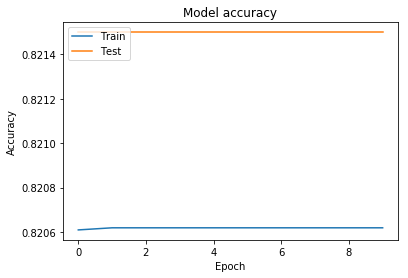

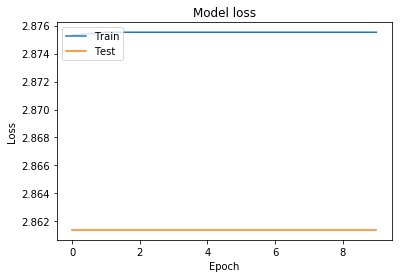

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()